Aula 2 - Regressão Múltipla e Formas Funcionais

Disciplina: Econometria Aplicada
Professor: João Ricardo Costa Filho
Grupo: Renan de Mello Contessoto, Guilherme Rafael Koch, Luiza Strano Oliveira


**1 -a)**

In [ ]:
url <- "https://raw.githubusercontent.com/costafilhojoao/Teaching/main/Econometria%20Aplicada/Atividades/Atividade%202/costafilho_neto.RData"
download.file(url, "costafilho_neto.RData" )
load("costafilho_neto.RData")


In [ ]:
data$region_c <- as.numeric(as.factor(data$region))

**b)**

In [ ]:
data$part_100 <- data$part * 100

**c)**

In [ ]:
data$part <- NULL # Exclui a variável 'part'
names(data)[names(data) == "part_100"] <- "part" # Renomeia 'part_100' para 'part'


**d)**

In [ ]:
attach(data)
d <- data.frame(CESI = policy, Democracy = democracy, GDPpc = gdppc, GINI = gini_disp, GOV = gov, PART = part)

The following objects are masked from data (pos = 3):

    code, country, democracy, emp, fiscal, gdppc, gini_disp, gov,
    income, macrofin, part, policy, pop, region, region_c, year


The following objects are masked from data (pos = 4):

    code, country, democracy, emp, fiscal, gdppc, gini_disp, gov,
    income, macrofin, part, policy, pop, region, region_c, year


The following objects are masked from data (pos = 5):

    code, country, democracy, emp, fiscal, gdppc, gini_disp, gov,
    income, macrofin, part, policy, pop, region, region_c, year


The following objects are masked from data (pos = 6):

    code, country, democracy, emp, fiscal, gdppc, gini_disp, gov,
    income, macrofin, part, policy, pop, region, region_c, year




**2)**

In [ ]:
# Instale o pacote stargazer se ainda não o fez:
install.packages("stargazer")

# Carregue o pacote stargazer:
library(stargazer)

# Gere a tabela de estatísticas descritivas:
stargazer(d, digits = 2, type = "text")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Statistic  N  Mean  St. Dev.  Min   Max  
-----------------------------------------
CESI      152 0.06    1.31   -4.25  4.85 
Democracy 152 55.98  21.71   14.90 98.70 
GDPpc     152 19.68  19.90   0.73  100.06
GINI      79  35.66   7.76   23.40 64.90 
GOV       152 18.47   7.53   2.20  57.79 
PART      152 42.79   9.82   19.08 86.87 
-----------------------------------------


**3 -a)**

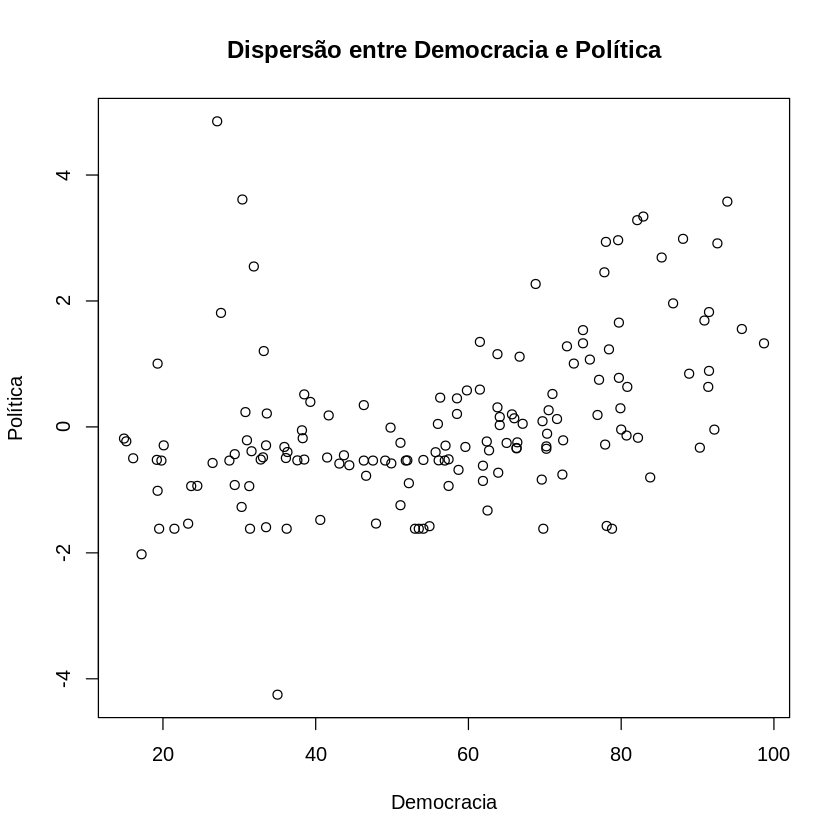

In [ ]:
plot(data$democracy, data$policy,
     main = "Dispersão entre Democracia e Política",
     xlab = "Democracia",
     ylab = "Política")


**b)**

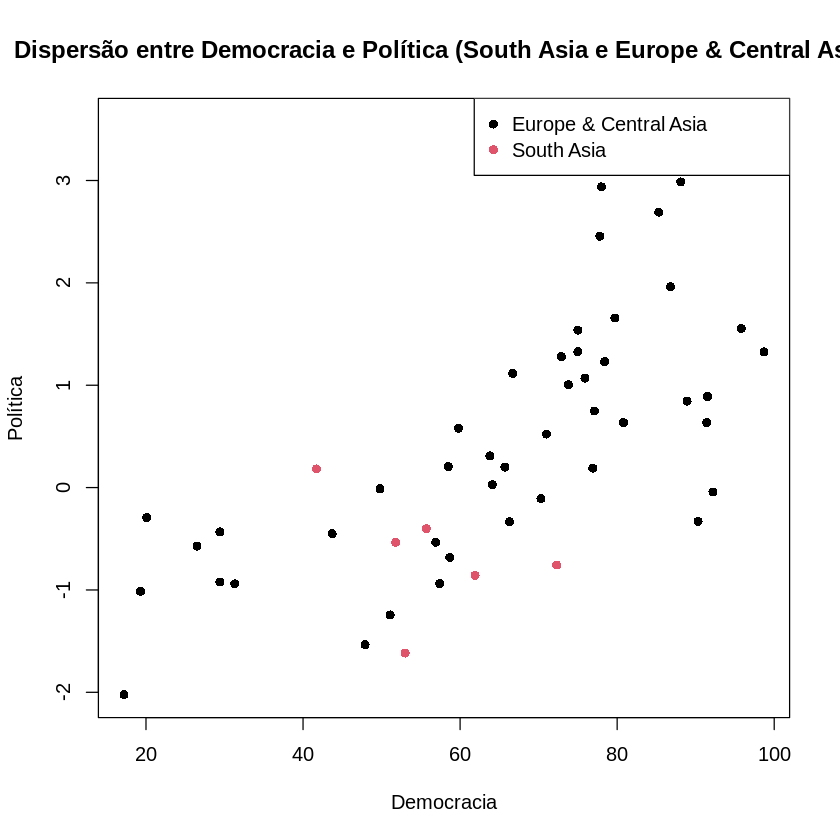

In [ ]:
# Filtrar os dados para as regiões específicas
data_filtered <- subset(data, region %in% c("South Asia", "Europe & Central Asia"))

# Gerar o gráfico de dispersão para os dados filtrados
plot(data_filtered$democracy, data_filtered$policy,
     main = "Dispersão entre Democracia e Política (South Asia e Europe & Central Asia)",
     xlab = "Democracia",
     ylab = "Política",
     col = as.factor(data_filtered$region), # Colore os pontos por região
     pch = 16) # Define o tipo de ponto

# Adicionar uma legenda para as regiões
legend("topright", legend = levels(as.factor(data_filtered$region)),
       col = 1:length(levels(as.factor(data_filtered$region))), pch = 16)


**c)**

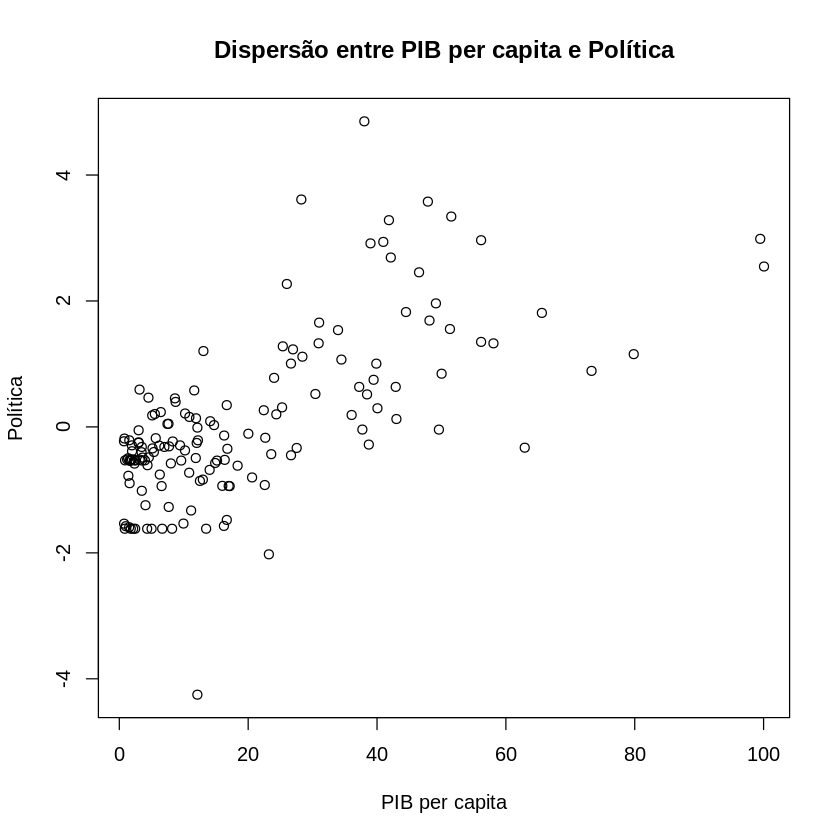

In [ ]:
plot(data$gdppc, data$policy,
     main = "Dispersão entre PIB per capita e Política",
     xlab = "PIB per capita",
     ylab = "Política")


**d)**

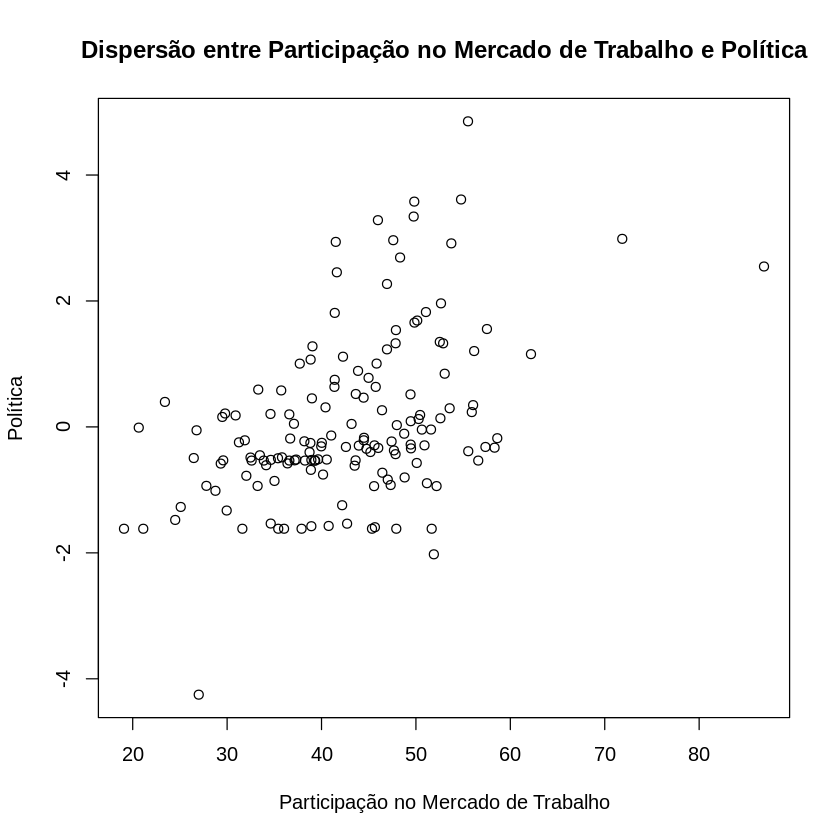

In [ ]:
plot(data$part, data$policy,
     main = "Dispersão entre Participação no Mercado de Trabalho e Política",
     xlab = "Participação no Mercado de Trabalho",
     ylab = "Política")


**e)**

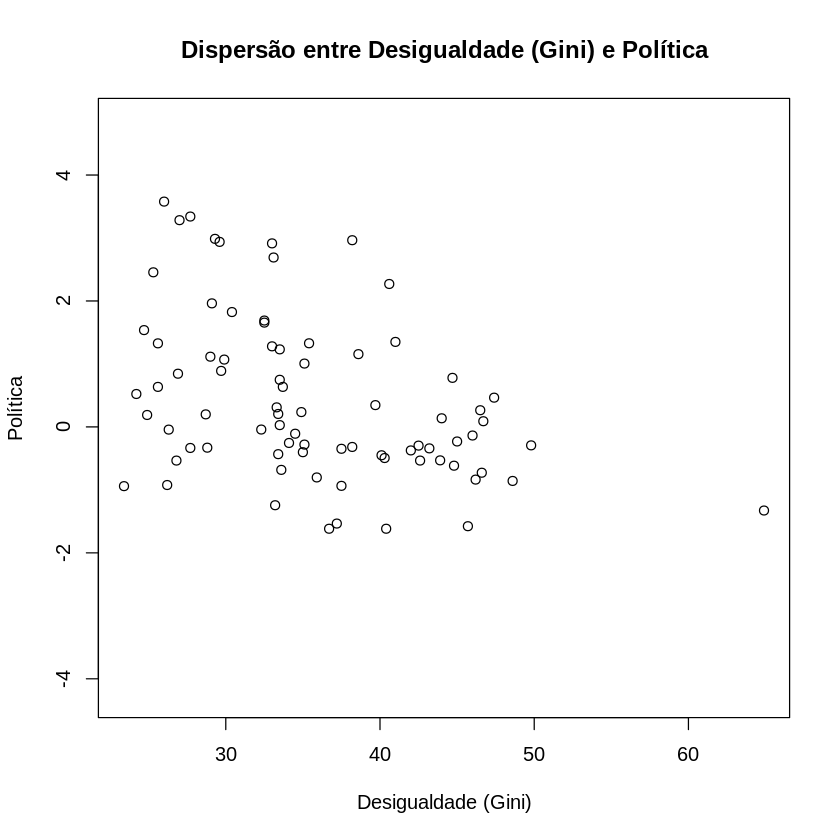

In [ ]:
plot(data$gini_disp, data$policy,
     main = "Dispersão entre Desigualdade (Gini) e Política",
     xlab = "Desigualdade (Gini)",
     ylab = "Política")


**4)**

Equação sugerida para o modelo econométrico: policy ~ democracy + gdppc + gini_disp + gov + part + as.factor(region)

Nível de Significância: Um nível de significância comumente utilizado em estudos econométricos é 5% (ou α=0.05α=0.05)

**5)**

In [ ]:

reg <- lm(policy ~ democracy + gdppc + gini_disp + gov + part + factor(region_c), data = data)
summary(reg)


Call:
lm(formula = policy ~ democracy + gdppc + gini_disp + gov + part + 
    factor(region_c), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2643 -0.6007 -0.0227  0.4733  1.9676 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)       -1.285001   1.564211  -0.822  0.41427   
democracy          0.025003   0.008572   2.917  0.00481 **
gdppc              0.018604   0.009846   1.889  0.06317 . 
gini_disp         -0.009096   0.022827  -0.398  0.69154   
gov               -0.007369   0.022084  -0.334  0.73967   
part               0.006891   0.019467   0.354  0.72445   
factor(region_c)3 -0.295534   0.388459  -0.761  0.44946   
factor(region_c)4 -0.635429   0.437932  -1.451  0.15145   
factor(region_c)5  0.086424   0.597513   0.145  0.88543   
factor(region_c)6  0.689348   0.732460   0.941  0.35001   
factor(region_c)7 -1.040197   0.643485  -1.617  0.11068   
factor(region_c)8 -0.698735   0.536294  -1.303  0.19707   
---
Signif. co

a)

Os resultados indicam que não há diferenças estatisticamente significativas na resposta de política econômica entre as regiões analisadas, após controlar pelas demais variáveis do modelo. Assim, não podemos afirmar que políticas diferenciadas por região sejam justificadas com base neste modelo e nestes dados

b)

A região 1 não aparece na regressão porque não tem dados disponíveis para atender analise.

C)

As estimativas dos erros-padrão diferem do artigo porque, provavelmente, o artigo utilizou métodos de ajuste como erros-padrão robustos (para heterocedasticidade) ou clusterizados por região, além de possíveis diferenças na amostra devido a dados faltantes ou filtros. Já o seu modelo usou os erros-padrão convencionais do OLS, que assumem homocedasticidade e não corrigem para dependências dentro dos grupos. Essas escolhas metodológicas impactam diretamente os valores dos erros-padrão e, portanto, as inferências estatísticas.

Conclusão:

O modelo de regressão indica que o nível de democracia tem um efeito positivo e estatisticamente significativo na intensidade da política econômica, mesmo após controlar por PIB per capita, desigualdade, governança, participação no mercado de trabalho e efeitos regionais. O PIB per capita também mostra uma associação positiva, embora marginalmente significativa.
No entanto, as variáveis de desigualdade, governança, participação no mercado de trabalho e as dummies regionais não demonstraram ter um impacto estatisticamente significativo na intensidade da política econômica neste modelo.